# Matthew Makila, HW1

### Library imports

In [29]:
import pandas as pd
import time
import numpy as nump
import matplotlib.pyplot as plt

### (Part A) Create the response vector and feature matrix from given data and scale it

In [30]:
def file_import(f_name):
    # specify features and the response var for file extraction and storage as a table
    feat_names = ['mpg','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
    f_feat_names = ['x0','cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']
    df = pd.read_excel(f_name, usecols=feat_names)
    resp_vect = df['mpg'].values.tolist()
    
    # scale the features
    scale_df = ((df-df.mean())/df.std())
    
    # add vector for x0 of 1's; remove the response var
    x_0 = []
    for i in range(len(resp_vect)): x_0.append(1)
    scale_df = scale_df.drop('mpg',axis='columns')
    scale_df.insert(0,"x0",x_0,True)

    # create feature matrix to store all scaled features
    feat_matrix = []
    for feat in f_feat_names:
        feat_matrix.append(scale_df[feat].values.tolist())
    return feat_matrix, resp_vect
    
    


### Response vector and feature matrix output

In [31]:
X,y = file_import('mileage.xlsx')

### (Part B) Function to compute the theta values using the GDA Algorithm

In [32]:
def gradient_descent(X, y, alpha):
    # create vector to hold the theta values (past and present), initialize our theta vectors to 0
    start = time.time()
    runtime = 0
    iteration_list = []
    iterations = 0
    threshold = 0.00001
    m = len(X[0])  # number of observations
    thetas = []
    old_thetas = []
    diff_vect = []
    costs = []
    for i in range(11):
        thetas.append(0)
        old_thetas.append(0)
        diff_vect.append(0)
    not_converged = True
    true_count = 0
    while not_converged:
        # loop over GDA equation algorithm
        for j in range(len(thetas)):    # loop to update each feature
            g_sum = 0
            for i in range(m):  # loop to compute each summation over all observations
                h_theta_x = 0
                for n in range(len(thetas)):
                    h_theta_x += (old_thetas[n] * X[n][i])
                g_sum += (X[j][i] * (h_theta_x - y[i]))
            # add back to new theta here
            thetas[j] = old_thetas[j] - (alpha / m) * g_sum
        # after one iteration, calculate the cost:
        g_sum = 0
        for i in range(m):  # loop to compute each summation over all observations
            h_theta_x = 0
            for n in range(len(thetas)):
                h_theta_x += (old_thetas[n] * X[n][i])
            g_sum += pow((h_theta_x - y[i]), 2)
        costs.append((1/(2*m)) * g_sum)
        iterations += 1
        iteration_list.append(iterations)
        # check differences of new thetas will old thetas & check threshold
        for i in range(len(thetas)):
            diff_vect[i] = abs(thetas[i] - old_thetas[i])
            if diff_vect[i] < threshold:
                true_count += 1

        # if all differences are less than threshold, we converged
        if true_count == len(diff_vect):
            not_converged = False
            end = time.time()
            runtime = end-start
            # print(thetas)
        else:
            # update old thetas to continue GDA next iteration
            true_count = 0
            for i in range(len(thetas)):
                old_thetas[i] = thetas[i]
    return thetas, runtime, costs, iteration_list

### GDA output of theta values, runtime, cost function, and iterations

In [33]:
gradient_descent(X,y,0.2)

([20.090625000000003,
  -0.1984967672340687,
  1.650593765144352,
  -1.472098351141184,
  0.42102332505661894,
  -3.6335879105034388,
  1.4666652572591803,
  0.16014005297309977,
  1.2575690395012986,
  0.4838002935710276,
  -0.32323359154847764],
 1.6306262016296387,
 [219.41109375,
  132.306046219674,
  85.52239686017703,
  55.68932559811532,
  36.58707830270217,
  24.35280884494676,
  16.51561053068968,
  11.493818222540328,
  8.274903995134283,
  6.210638829725083,
  4.885989286129073,
  4.035202720079824,
  3.4880943147175745,
  3.1356647332739405,
  2.9080906443557737,
  2.760634914407404,
  2.664626199214002,
  2.60168358770433,
  2.560018577828478,
  2.532066935082475,
  2.5129719811283224,
  2.4996130364461284,
  2.489982948378354,
  2.482789179996899,
  2.4771980922818915,
  2.4726709595422003,
  2.4688587641844038,
  2.465534665124908,
  2.462550620291873,
  2.4598095013911134,
  2.4572471500815474,
  2.4548208173119974,
  2.452501704078446,
  2.4502701397950544,
  2.4481124

### (Part E) Function to compute and output the theta values using the normal equations method

In [34]:
def normal_eq(feat, resp):
    X1 = nump.array(feat).T
    y1 = nump.array(resp)
    temp = nump.dot(X1.T, X1)
    temp = nump.linalg.inv(temp)
    temp = nump.dot(temp, X1.T)
    temp = nump.dot(temp, y1)
    Thetas = temp
    print(Thetas)

### Normal Equations method Theta outputs

In [35]:
# create normal equations theta outputs
normal_eq(X, y)

[20.090625   -0.19902396  1.65275222 -1.4728757   0.4208515  -3.63526678
  1.46715321  0.16015758  1.25757033  0.48356639 -0.32210198]


### Function to plot the costs against the learning rates

In [36]:
def plotting(xs, ys, rates):
    for i in range(len(xs)):
        plt.plot(xs[i][200:], ys[i][200:], label="alpha = {}".format(rates[i]))
    plt.legend()
    plt.ylabel("Cost")
    plt.xlabel("Iterations")
    plt.show()

### Function to plot the runtimes against the learning rates

In [37]:
def plot_runtime(rt, rates):
    plt.grid()
    plt.scatter(rates, rt)
    plt.ylabel("Runtime")
    plt.xlabel("Learning Rate")
    plt.show()

### (Part C and Extra Credit) The testing suite to compute different alphas, the normal equations method, and plot graphs of cost and runtime

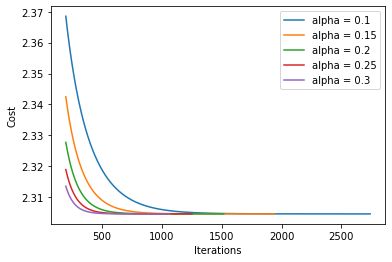

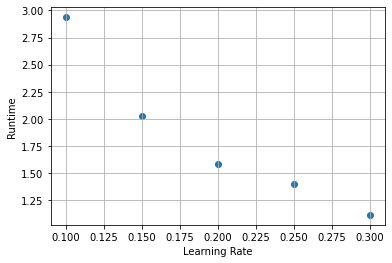

In [38]:
cost_vect = []
iteration_vect = []
runtime_vect = []
alphas = [0.1, 0.15, 0.2, 0.25, 0.3]

# data gathering suite

Thetas, runtime0, costs0, iterations0 = gradient_descent(X, y, 0.1)
cost_vect.append(costs0)
runtime_vect.append(runtime0)
iteration_vect.append(iterations0)

Thetas1, runtime1, costs1, iterations1 = gradient_descent(X, y, 0.15)
cost_vect.append(costs1)
runtime_vect.append(runtime1)
iteration_vect.append(iterations1)

Thetas2, runtime2, costs2, iterations2 = gradient_descent(X, y, 0.2)
cost_vect.append(costs2)
runtime_vect.append(runtime2)
iteration_vect.append(iterations2)

Thetas3, runtime3, costs3, iterations3 = gradient_descent(X, y, 0.25)
cost_vect.append(costs3)
runtime_vect.append(runtime3)
iteration_vect.append(iterations3)

Thetas4, runtime4, costs4, iterations4 = gradient_descent(X, y, 0.3)
cost_vect.append(costs4)
runtime_vect.append(runtime4)
iteration_vect.append(iterations4)

# create plot of cost functions vs. iterations
plotting(iteration_vect, cost_vect, alphas)
# plot of runtimes vs. alphas
plot_runtime(runtime_vect, alphas)

### The above graphs represent the (1) learning rates plotted against the iterations and (2) the runtimes plotted against the learning rates

##### We can see in plot 1 the correlation between the costs and the learning rate. The costs become lesser as we increase the learning rate.
##### We also see in plot 2 the correlation between the learning rate and runtime. As the learning rate increases, our runtime decreases.

### (Part D)
##### It is evident that the convergence is reached faster with a higher learning rate.

### (Part E)
##### In parts B and E, we are able to reach convergence with the correct alpha values. However, the normal equations method is faster than the GDA approach. The GDA approach is also iterative while the normal equations method is not and can be done faster as a result.